In [19]:
import os
import glob
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Data cleaning
- Stardardize datatypes
- Normalize(lowercase, etc)
- Deduplicate
- write to a cleaned csv file


In [4]:
# data_p = r"C:\Users\hn0139\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\merged_all_data.csv"
data_p = r"C:\Users\huyen\Documents\temp_misinformation\metadata\merged_all_data\merged_all_data.csv"
with open(data_p, 'r', encoding='utf-8', newline='') as f:
    all_df = pd.read_csv(f)
df_copy = all_df.copy()
df_copy 

,Unnamed: 0,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type
0,0,WHO competency framework for health authoritie...,"Rubinelli S,Purnat TD,Wihelm E,Traicoff D,Nama...",Human Resources for Health,2022,NaN,NaN,NaN,10.1186/s12960-022-00733-0,disinformation,scopus,Journal Article
1,1,A cross-sectional study of factors associated ...,"Yeager S,Abramovitz D,Harvey-Vera AY,Vera CF,A...",BMC Public Health,2022,NaN,NaN,NaN,10.1186/s12889-022-13273-y,disinformation,scopus,Journal Article
2,2,Mapping state-sponsored information operations...,"Uyheng J,Cruickshank IJ,Carley KM",EPJ Data Science,2022,NaN,NaN,NaN,10.1140/epjds/s13688-022-00338-6,disinformation,scopus,Journal Article
3,3,A digital media literacy intervention for olde...,"Moore RC,Hancock JT",Scientific Reports,2022,NaN,NaN,NaN,10.1038/s41598-022-08437-0,disinformation,scopus,Journal Article
4,4,Lateral reading and monetary incentives to spo...,"Panizza F,Ronzani P,Martini C,Mattavelli S,Mor...",Scientific Reports,2022,NaN,NaN,NaN,10.1038/s41598-022-09168-y,disinformation,scopus,Journal Article
...,...,...,...,...,...,...,...,...,...,...,...,...
24051,6214,Effective strategies for responding to rumors ...,"Paek HJ,Hove T",Public Relations Review,2019,NaN,NaN,This experimental study explores how governmen...,10.1016/j.pubrev.2019.02.006,rumor,science_direct,Journal Article
24052,6215,Factors affecting individual online rumor shar...,"Luo P,Wang C,Guo F,Luo L",Computers in Human Behavior,2021,NaN,NaN,"With the outbreak of COVID-19, online sharing ...",10.1016/j.chb.2021.106968,rumor,science_direct,Journal Article
24053,6216,Stability and Hopf bifurcation analysis of mul...,"Wang J,Jiang H,Hu C,Yu Z,Li J","Chaos, Solitons & Fractals",2021,NaN,NaN,The stability and hopf bifurcation of the mult...,10.1016/j.chaos.2021.111464,rumor,science_direct,Journal Article
24054,6217,Soft rumor control in social networks: Modelin...,"Askarizadeh M,Tork Ladani B",Engineering Applications of Artificial Intelli...,2021,NaN,NaN,"Nowadays, social networks become ubiquitous pl...",10.1016/j.engappai.2021.104198,rumor,science_direct,Journal Article


In [5]:
# Inspect null values
df_copy.isnull().sum()

Unnamed: 0              0
title                   0
authors               232
venue                3370
year                  358
citationCount       17977
fieldsOfStudy       12321
abstract             7893
doi                  7149
query                   0
database                0
publication_type     5940
dtype: int64

In [6]:
# Normalizing to find duplicates, 
# then save the normalized values into new columns: 'title_', 'authors_', 'venue_', 'doi_'

def lowercase(x):
    return x.lower()

def remove_punctuation(x):
    cleaned_x = re.sub(r'[^\w\s]', '', x)
    return cleaned_x
    
fields_to_dedup = ['title', 'authors', 'venue', 'doi']
for field in fields_to_dedup:
    df_copy[field+'_'] = df_copy[field].apply(lambda x: lowercase(x) if type(x)==str else x)
    df_copy[field+'_'] = df_copy[field].apply(lambda x: remove_punctuation(x) if type(x)==str else x)
    
df_copy.head()

,Unnamed: 0,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type,title_,authors_,venue_,doi_
0,0,WHO competency framework for health authoritie...,"Rubinelli S,Purnat TD,Wihelm E,Traicoff D,Nama...",Human Resources for Health,2022,NaN,NaN,NaN,10.1186/s12960-022-00733-0,disinformation,scopus,Journal Article,WHO competency framework for health authoritie...,Rubinelli SPurnat TDWihelm ETraicoff DNamageyo...,Human Resources for Health,101186s12960022007330
1,1,A cross-sectional study of factors associated ...,"Yeager S,Abramovitz D,Harvey-Vera AY,Vera CF,A...",BMC Public Health,2022,NaN,NaN,NaN,10.1186/s12889-022-13273-y,disinformation,scopus,Journal Article,A crosssectional study of factors associated w...,Yeager SAbramovitz DHarveyVera AYVera CFAlgari...,BMC Public Health,101186s1288902213273y
2,2,Mapping state-sponsored information operations...,"Uyheng J,Cruickshank IJ,Carley KM",EPJ Data Science,2022,NaN,NaN,NaN,10.1140/epjds/s13688-022-00338-6,disinformation,scopus,Journal Article,Mapping statesponsored information operations ...,Uyheng JCruickshank IJCarley KM,EPJ Data Science,101140epjdss13688022003386
3,3,A digital media literacy intervention for olde...,"Moore RC,Hancock JT",Scientific Reports,2022,NaN,NaN,NaN,10.1038/s41598-022-08437-0,disinformation,scopus,Journal Article,A digital media literacy intervention for olde...,Moore RCHancock JT,Scientific Reports,101038s41598022084370
4,4,Lateral reading and monetary incentives to spo...,"Panizza F,Ronzani P,Martini C,Mattavelli S,Mor...",Scientific Reports,2022,NaN,NaN,NaN,10.1038/s41598-022-09168-y,disinformation,scopus,Journal Article,Lateral reading and monetary incentives to spo...,Panizza FRonzani PMartini CMattavelli SMorisse...,Scientific Reports,101038s4159802209168y


In [7]:
# Observe the number of duplicates given the above fields.

print("number of duplicates using 'title',  'authors', 'venue', 'year': ", df_copy[df_copy.duplicated(subset = ['title_',  'authors_', 'venue_','year'])].shape[0])
print("number of duplicates using 'title',  'authors', 'venue': ", df_copy[df_copy.duplicated(subset = ['title_',  'authors_', 'venue_'])].shape[0])
print("number of duplicates using 'title',  'authors', 'year': ", df_copy[df_copy.duplicated(subset = ['title_',  'authors_', 'year'])].shape[0])
print("number of duplicates using 'title',  'authors': ", df_copy[df_copy.duplicated(subset = ['title_',  'authors_'])].shape[0])
print("number of duplicates using 'title',  'year': ", df_copy[df_copy.duplicated(subset = ['title_',  'year'])].shape[0])
print("number of duplicates using 'title', 'doi': ", df_copy[df_copy.duplicated(subset = ['title_', 'doi_'])].shape[0])
print("number of duplicates using 'title': ", df_copy[df_copy.duplicated(subset = ['title_'])].shape[0])


number of duplicates using 'title',  'authors', 'venue', 'year':  5419
number of duplicates using 'title',  'authors', 'venue':  5596
number of duplicates using 'title',  'authors', 'year':  5498
number of duplicates using 'title',  'authors':  5681
number of duplicates using 'title',  'year':  6393
number of duplicates using 'title', 'doi':  7195
number of duplicates using 'title':  8449


### The 'title' variable does not have any null values. Additionally, the above observation indicates that we can find the highest number of duplicate using this variable. Therefore, I relied on 'title' to remove duplicate in the first step. Let's have a look at the duplicate examples given the 'title' variable below: 

In [8]:
pd.set_option('display.width', 2000)
df_copy[df_copy.duplicated(subset = ['title_'])].sort_values('title_')[:50]

,Unnamed: 0,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type,title_,authors_,venue_,doi_
1305,305,10th World Conference on Information Systems a...,NaN,Lecture Notes in Networks and Systems,2022,NaN,NaN,NaN,NaN,fake+news,scopus,Journal Article,10th World Conference on Information Systems a...,NaN,Lecture Notes in Networks and Systems,NaN
1309,309,10th World Conference on Information Systems a...,NaN,Lecture Notes in Networks and Systems,2022,NaN,NaN,NaN,NaN,fake+news,scopus,Journal Article,10th World Conference on Information Systems a...,NaN,Lecture Notes in Networks and Systems,NaN
17963,126,11.12 - Clinical Psychology Responses to the C...,"Doherty TJ,Lykins AD,Piotrowski NA,Rogers Z,Se...",NaN,2022,NaN,NaN,Intervention in issues related to climate chan...,10.1016/B978-0-12-818697-8.00236-3,disinformation,science_direct,Book Chapter,1112 Clinical Psychology Responses to the Cli...,Doherty TJLykins ADPiotrowski NARogers ZSebree...,NaN,101016B9780128186978002363
18363,526,11.12 - Clinical Psychology Responses to the C...,"Doherty TJ,Lykins AD,Piotrowski NA,Rogers Z,Se...",NaN,2022,NaN,NaN,Intervention in issues related to climate chan...,10.1016/B978-0-12-818697-8.00236-3,disinformation,science_direct,Book Chapter,1112 Clinical Psychology Responses to the Cli...,Doherty TJLykins ADPiotrowski NARogers ZSebree...,NaN,101016B9780128186978002363
18063,226,11.12 - Clinical Psychology Responses to the C...,"Doherty TJ,Lykins AD,Piotrowski NA,Rogers Z,Se...",NaN,2022,NaN,NaN,Intervention in issues related to climate chan...,10.1016/B978-0-12-818697-8.00236-3,disinformation,science_direct,Book Chapter,1112 Clinical Psychology Responses to the Cli...,Doherty TJLykins ADPiotrowski NARogers ZSebree...,NaN,101016B9780128186978002363
18163,326,11.12 - Clinical Psychology Responses to the C...,"Doherty TJ,Lykins AD,Piotrowski NA,Rogers Z,Se...",NaN,2022,NaN,NaN,Intervention in issues related to climate chan...,10.1016/B978-0-12-818697-8.00236-3,disinformation,science_direct,Book Chapter,1112 Clinical Psychology Responses to the Cli...,Doherty TJLykins ADPiotrowski NARogers ZSebree...,NaN,101016B9780128186978002363
18463,626,11.12 - Clinical Psychology Responses to the C...,"Doherty TJ,Lykins AD,Piotrowski NA,Rogers Z,Se...",NaN,2022,NaN,NaN,Intervention in issues related to climate chan...,10.1016/B978-0-12-818697-8.00236-3,disinformation,science_direct,Book Chapter,1112 Clinical Psychology Responses to the Cli...,Doherty TJLykins ADPiotrowski NARogers ZSebree...,NaN,101016B9780128186978002363
18563,726,11.12 - Clinical Psychology Responses to the C...,"Doherty TJ,Lykins AD,Piotrowski NA,Rogers Z,Se...",NaN,2022,NaN,NaN,Intervention in issues related to climate chan...,10.1016/B978-0-12-818697-8.00236-3,disinformation,science_direct,Book Chapter,1112 Clinical Psychology Responses to the Cli...,Doherty TJLykins ADPiotrowski NARogers ZSebree...,NaN,101016B9780128186978002363
18663,826,11.12 - Clinical Psychology Responses to the C...,"Doherty TJ,Lykins AD,Piotrowski NA,Rogers Z,Se...",NaN,2022,NaN,NaN,Intervention in issues related to climate chan...,10.1016/B978-0-12-818697-8.00236-3,disinformation,science_direct,Book Chapter,1112 Clinical Psychology Responses to the Cli...,Doherty TJLykins ADPiotrowski NARogers ZSebree...,NaN,101016B9780128186978002363
18763,926,11.12 - Clinical Psychology Responses to the C...,"Doherty TJ,Lykins AD,Piotrowski NA,Rogers Z,Se...",NaN,2022,NaN,NaN,Intervention in issues related to climate chan...,10.1016/B978-0-12-818697-8.00236-3,disinformation,science_direct,Book Chapter,1112 Clinical Psychology Responses to the Cli...,Doherty TJLykins ADPiotrowski NARogers ZSebree...,NaN,101016B9780128186978002363


### Let's move on to remove duplicates from the data using 'title'.

In [9]:
# deduplicate

df_deduplicated = df_copy.drop_duplicates(subset = ['title_'])
print('The number of examples after dropping duplicates: %d' %df_deduplicated.shape[0])

The number of examples after dropping duplicates: 15607


### Let's inspect the number of duplicates again:

In [10]:
# Observe the number of duplicates given the above fields.

print("number of duplicates using 'title',  'authors', 'venue', 'year': ", df_deduplicated[df_deduplicated.duplicated(subset = ['title_',  'authors_', 'venue_','year'])].shape[0])
print("number of duplicates using 'title',  'authors', 'venue': ", df_deduplicated[df_deduplicated.duplicated(subset = ['title_',  'authors_', 'venue_'])].shape[0])
print("number of duplicates using 'title',  'authors', 'year': ", df_deduplicated[df_deduplicated.duplicated(subset = ['title_',  'authors_', 'year'])].shape[0])
print("number of duplicates using 'title',  'authors': ", df_deduplicated[df_deduplicated.duplicated(subset = ['title_',  'authors_'])].shape[0])
print("number of duplicates using 'title',  'year': ", df_deduplicated[df_deduplicated.duplicated(subset = ['title_',  'year'])].shape[0])
print("number of duplicates using 'title', 'doi': ", df_deduplicated[df_deduplicated.duplicated(subset = ['title_', 'doi_'])].shape[0])
print("number of duplicates using 'title': ", df_deduplicated[df_deduplicated.duplicated(subset = ['title_'])].shape[0])

number of duplicates using 'title',  'authors', 'venue', 'year':  0
number of duplicates using 'title',  'authors', 'venue':  0
number of duplicates using 'title',  'authors', 'year':  0
number of duplicates using 'title',  'authors':  0
number of duplicates using 'title',  'year':  0
number of duplicates using 'title', 'doi':  0
number of duplicates using 'title':  0


#### No more duplicates found! Let's move on to check whether the data meet the year criteria (from 2010-2022)

In [11]:
# First drop the columns we created to store normalized values, including 'title_', 'authors_', 'venue_', 'doi_'
df_deduplicated = df_deduplicated.drop(columns = ['title_', 'authors_', 'venue_', 'doi_'])
print(df_deduplicated.shape)




(15607, 12)


### Check data to meet the year criteria (from 2010-2022)

In [12]:
df_deduplicated = df_deduplicated[df_deduplicated['year']!='Publication year']
df_deduplicated['year'] = df_deduplicated['year'].astype(float).astype("Int32")
df_year =  pd.DataFrame(df_deduplicated[~df_deduplicated['year'].isna()])

In [13]:
df_year

,Unnamed: 0,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type
0,0,WHO competency framework for health authoritie...,"Rubinelli S,Purnat TD,Wihelm E,Traicoff D,Nama...",Human Resources for Health,2022,NaN,NaN,NaN,10.1186/s12960-022-00733-0,disinformation,scopus,Journal Article
1,1,A cross-sectional study of factors associated ...,"Yeager S,Abramovitz D,Harvey-Vera AY,Vera CF,A...",BMC Public Health,2022,NaN,NaN,NaN,10.1186/s12889-022-13273-y,disinformation,scopus,Journal Article
2,2,Mapping state-sponsored information operations...,"Uyheng J,Cruickshank IJ,Carley KM",EPJ Data Science,2022,NaN,NaN,NaN,10.1140/epjds/s13688-022-00338-6,disinformation,scopus,Journal Article
3,3,A digital media literacy intervention for olde...,"Moore RC,Hancock JT",Scientific Reports,2022,NaN,NaN,NaN,10.1038/s41598-022-08437-0,disinformation,scopus,Journal Article
4,4,Lateral reading and monetary incentives to spo...,"Panizza F,Ronzani P,Martini C,Mattavelli S,Mor...",Scientific Reports,2022,NaN,NaN,NaN,10.1038/s41598-022-09168-y,disinformation,scopus,Journal Article
...,...,...,...,...,...,...,...,...,...,...,...,...
24008,6171,Denigration Bullying Resolution using Wolf Sea...,"Sangwan SR,Bhatia MPS",Procedia Computer Science,2020,NaN,NaN,Denigration is the most common bullying tactic...,10.1016/j.procs.2020.06.036,rumor,science_direct,Journal Article
24023,6186,Epidemic model on rumor propagation in e-commerce,"Kishore R,Tyagi I,Rao YS,Kumar D",Materials Today: Proceedings,2022,NaN,NaN,In the present scenario for business and commu...,10.1016/j.matpr.2021.11.263,rumor,science_direct,Journal Article
24034,6197,Increased incidence of cutaneous Staphylococcu...,"Suarez-Diaz E,Hubiche T,Del Giudice P",Annales de Dermatologie et de Vénéréologie,2022,NaN,NaN,Background Natural disasters are typically ass...,10.1016/j.annder.2021.12.004,rumor,science_direct,Journal Article
24042,6205,A cross-sectional study of Persian medicine an...,"Vardanjani HM,Heydari ST,Dowran B,Pasalar M",Integrative Medicine Research,2020,NaN,NaN,Background Traditional medicine structures suc...,10.1016/j.imr.2020.100482,rumor,science_direct,Journal Article


2021    3460
2022    2829
2020    1707
2019    1167
2018     966
        ... 
1961       1
1908       1
2023       1
1968       1
1936       1
Name: year, Length: 87, dtype: Int64


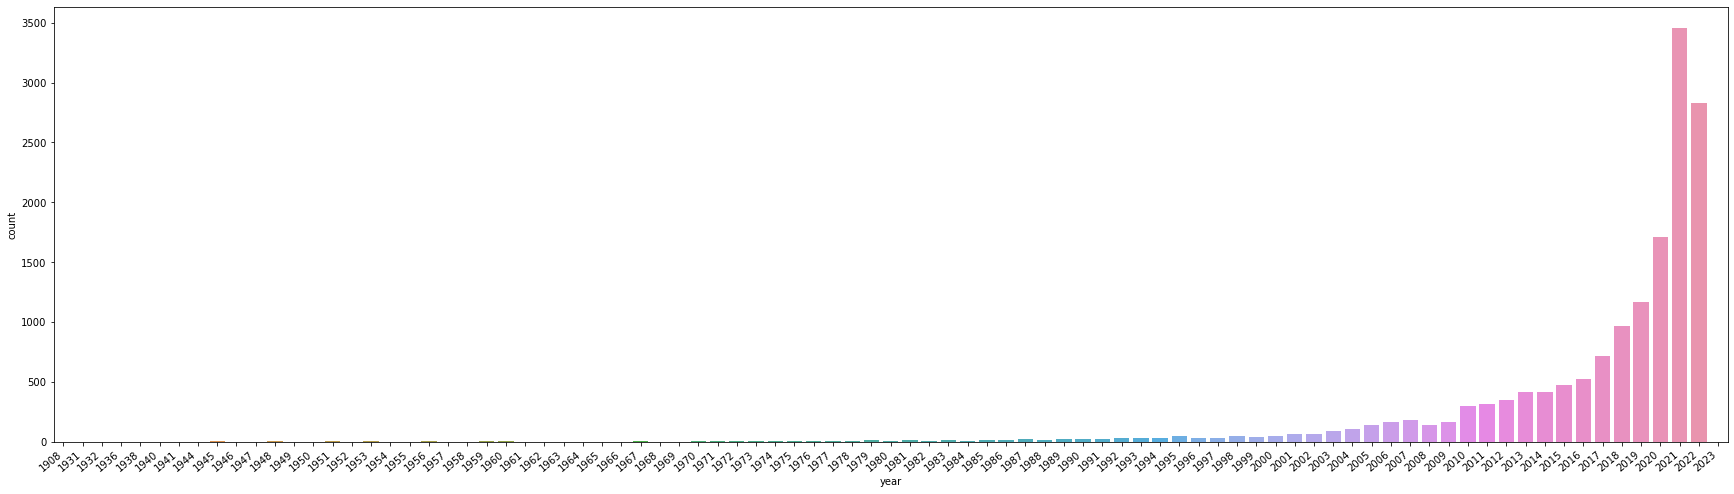

In [14]:
print(df_year['year'].value_counts())
plt.figure(figsize=(30,8))
sns.countplot(x='year', data=df_year)
plt.xticks(rotation = 40, ha = 'right')
plt.tick_params(axis='both', which='minor', labelsize=4)
plt.show()

#### Even using year filter in each database, we still got a lot of data out of our expected timespan. Let's only retain the data within 2010 to 2022 or null year (as we are not sure the year):

In [15]:
df_deduplicated = df_deduplicated.loc[(df_deduplicated['year'].isna()) | ((df_deduplicated['year']>=2010)&(df_deduplicated['year']<2023))]
print('the number of examples which meet the year condition: ', df_deduplicated.shape[0])

the number of examples which meet the year condition:  13823


#### Lastly, let's normalize the 'publication_types' that we are going to use later


In [16]:
print(df_deduplicated['publication_type'].value_counts())
type_dic = {
    'Journal Article': 'journal',
    'J': 'journal',
    'Conference Paper': 'conference',
    'Book': 'book',
    'Book Chapter': 'book',
    'S': 'other'
}
for k, v in type_dic.items():
    df_deduplicated['publication_type'] = df_deduplicated['publication_type'].replace(k, v) 
    
print(df_deduplicated['publication_type'].value_counts())


Journal Article     5678
J                   3503
Conference Paper     886
Book                 134
Book Chapter           8
S                      1
Name: publication_type, dtype: int64
journal       9181
conference     886
book           142
other            1
Name: publication_type, dtype: int64


#### Now let's write the data meeting the primary criteria to csv file

In [17]:
# write output file to csv
# out_p = r"C:\Users\hn0139\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\merged_all_data_deduplicated.csv"
out_p = r"C:\Users\huyen\Documents\temp_misinformation\metadata\merged_all_data\merged_all_data_deduplicated.csv"
with open(out_p, 'w', encoding = 'utf-8', newline = '') as f:
    df_deduplicated.to_csv(f) 

# Exploratory analysis
On the deduplicated data, we do:
1. Explore null values/column
2. Explore data distribution in databases, queries, years, venues.


In [18]:
# Loading the deduplicted data file
# in_p = r"C:\Users\hn0139\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\merged_all_data_deduplicated.csv"
in_p = r"C:\Users\huyen\Documents\temp_misinformation\metadata\merged_all_data\merged_all_data_deduplicated.csv"
with open(in_p, 'r', encoding = 'utf-8', newline = '') as f:
    data = pd.read_csv(f) 
data = data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1']) # window keeps creating this nonsense column if we manually open it.
data['year'] = data['year'].astype(float).astype("Int32")

data

,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type
0,WHO competency framework for health authoritie...,"Rubinelli S,Purnat TD,Wihelm E,Traicoff D,Nama...",Human Resources for Health,2022,NaN,NaN,NaN,10.1186/s12960-022-00733-0,disinformation,scopus,journal
1,A cross-sectional study of factors associated ...,"Yeager S,Abramovitz D,Harvey-Vera AY,Vera CF,A...",BMC Public Health,2022,NaN,NaN,NaN,10.1186/s12889-022-13273-y,disinformation,scopus,journal
2,Mapping state-sponsored information operations...,"Uyheng J,Cruickshank IJ,Carley KM",EPJ Data Science,2022,NaN,NaN,NaN,10.1140/epjds/s13688-022-00338-6,disinformation,scopus,journal
3,A digital media literacy intervention for olde...,"Moore RC,Hancock JT",Scientific Reports,2022,NaN,NaN,NaN,10.1038/s41598-022-08437-0,disinformation,scopus,journal
4,Lateral reading and monetary incentives to spo...,"Panizza F,Ronzani P,Martini C,Mattavelli S,Mor...",Scientific Reports,2022,NaN,NaN,NaN,10.1038/s41598-022-09168-y,disinformation,scopus,journal
...,...,...,...,...,...,...,...,...,...,...,...
13818,Denigration Bullying Resolution using Wolf Sea...,"Sangwan SR,Bhatia MPS",Procedia Computer Science,2020,NaN,NaN,Denigration is the most common bullying tactic...,10.1016/j.procs.2020.06.036,rumor,science_direct,journal
13819,Epidemic model on rumor propagation in e-commerce,"Kishore R,Tyagi I,Rao YS,Kumar D",Materials Today: Proceedings,2022,NaN,NaN,In the present scenario for business and commu...,10.1016/j.matpr.2021.11.263,rumor,science_direct,journal
13820,Increased incidence of cutaneous Staphylococcu...,"Suarez-Diaz E,Hubiche T,Del Giudice P",Annales de Dermatologie et de Vénéréologie,2022,NaN,NaN,Background Natural disasters are typically ass...,10.1016/j.annder.2021.12.004,rumor,science_direct,journal
13821,A cross-sectional study of Persian medicine an...,"Vardanjani HM,Heydari ST,Dowran B,Pasalar M",Integrative Medicine Research,2020,NaN,NaN,Background Traditional medicine structures suc...,10.1016/j.imr.2020.100482,rumor,science_direct,journal


In [19]:
# Inspect null values
data.isnull().sum()

title                   0
authors               110
venue                2157
year                  171
citationCount       10076
fieldsOfStudy        6851
abstract             6284
doi                  4646
query                   0
database                0
publication_type     3613
dtype: int64

#### together with 'query', and 'database', we wanted to explore data distribution in 'venue' and 'year', but they contains so many null values. Therefore, we need to keep in mind that it may not actual distribution.

### Year distribution

2021    3460
2022    2829
2020    1707
2019    1167
2018     966
2017     719
2016     521
2015     476
2013     419
2014     418
2012     352
2011     316
2010     302
Name: year, dtype: Int64


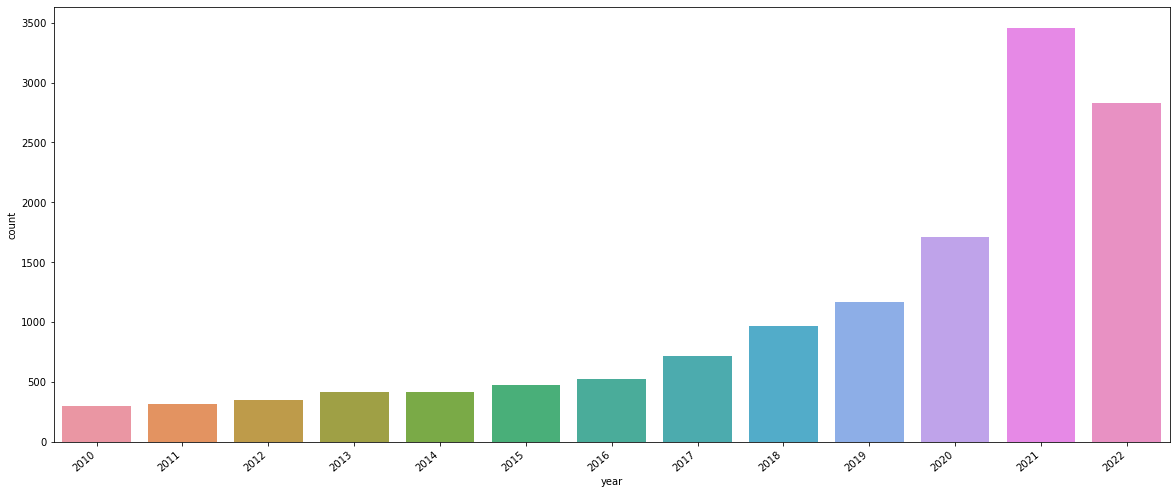

In [20]:
df_year =  pd.DataFrame(data[~data['year'].isna()])
print(df_year['year'].value_counts())
plt.figure(figsize=(20,8))
sns.countplot(x='year', data=df_year)
plt.xticks(rotation = 40, ha = 'right')
plt.show()

### Query distribution

In [21]:
data['query'] = data['query'].replace('Spam', 'spam') # I forgot to normalize this bf

misinformation    2651
rumor             2553
disinformation    2409
spam              2224
fake+news         2117
troll             1869
Name: query, dtype: int64


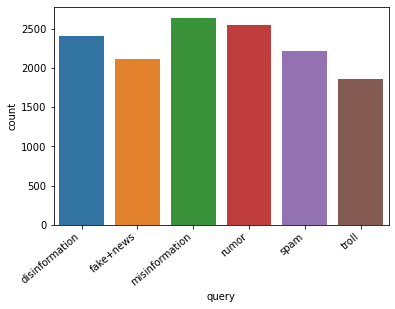

In [22]:
print(data['query'].value_counts())
sns.countplot(x='query', data=data)
plt.xticks(rotation = 40, ha = 'right')
plt.show()

#### One way to reduce the number of examples is to use the queries that  most likely retrieve the most relevant papers. Here, we can consider to use only 2-3 queries: 'misinformation' , 'disinformation', and/or 'fake+news'.

### Database distribution

scopus              5214
semantic_scholar    3613
wos                 3504
science_direct      1492
Name: database, dtype: int64


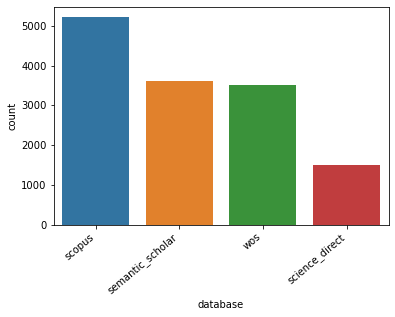

In [23]:
print(data['database'].value_counts())
sns.countplot(x='database', data=data)
plt.xticks(rotation = 40, ha = 'right')
plt.show()

### Venue distribution
We need to keep in mind that 'venue' variable has 2157 null values

In [24]:
print(data['venue'].value_counts())


ArXiv                                                                                                                                   128
Lecture Notes in Networks and Systems                                                                                                    86
Vaccine                                                                                                                                  81
Physica A: Statistical Mechanics and its Applications                                                                                    73
Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)     68
                                                                                                                                       ... 
SIMBIOTICA                                                                                                                                1
Aesthetic Plastic Su

In [25]:
temp = pd.DataFrame(data['venue'].str.lower().value_counts().rename_axis('count').reset_index(name='venue'))
for k, v in zip(temp['count'], temp['venue']):
    print('%s -----> %s' %(k,v))

arxiv -----> 128
ieee access -----> 105
plos one -----> 87
lecture notes in networks and systems -----> 86
vaccine -----> 84
international journal of environmental research and public health -----> 81
physica a: statistical mechanics and its applications -----> 73
lecture notes in computer science (including subseries lecture notes in artificial intelligence and lecture notes in bioinformatics) -----> 68
computers in human behavior -----> 68
www -----> 67
expert systems with applications -----> 63
journal of medical internet research -----> 56
information sciences -----> 48
physica a-statistical mechanics and its applications -----> 46
international journal of advanced computer science and applications -----> 46
international journal of communication -----> 45
personality and individual differences -----> 44
icwsm -----> 42
social network analysis and mining -----> 39
multimedia tools and applications -----> 38
procedia computer science -----> 38
communications in computer and informat

child's nervous system -----> 2
pattern recognit. lett. -----> 2
journal of the american association for laboratory animal science -----> 2
basic & clinical pharmacology & toxicology -----> 2
international journal of asian business and information management -----> 2
ntut journal of intellectual property law and management -----> 2
journal of forensic psychiatry & psychology -----> 2
revue d anthropologie des connaissances -----> 2
journal of the royal society interface -----> 2
journal of physics: complexity -----> 2
fertility and sterility -----> 2
the north american journal of economics and finance -----> 2
technovation -----> 2
ssm - qualitative research in health -----> 2
journal of information science and engineering -----> 2
csonet -----> 2
language, speech, and hearing services in schools -----> 2
psychiatric services -----> 2
journal of interactive marketing -----> 2
elektrotechnik und informationstechnik -----> 2
journal of children and media -----> 2
ares -----> 2
brain, beh

tpm - testing, psychometrics, methodology in applied psychology -----> 1
zhejiang daxue xuebao (gongxue ban)/journal of zhejiang university (engineering science) -----> 1
nature reviews disease primers -----> 1
english academy review-southern african journal of english studies -----> 1
gland surgery -----> 1
journal of mathematics and computer science-jmcs -----> 1
south eastern european journal of public health -----> 1
korea observer -----> 1
2019 3rd international conference on trends in electronics and informatics (icoei) -----> 1
political studies review -----> 1
cognition & emotion -----> 1
bell labs technical journal -----> 1
dirasat: human and social sciences -----> 1
perifrasis-revista de literatura teoria y critica -----> 1
sociological research online -----> 1
canadian journal of criminology and criminal justice -----> 1
international journal of health sciences -----> 1
journal of vascular surgery -----> 1
food science and technology (brazil) -----> 1
journal of social and p

neural comput. appl. -----> 1
fire -----> 1
environmental sociology -----> 1
clinical cancer research -----> 1
the journal of social psychology -----> 1
swarm and evolutionary computation -----> 1
journal of international migration and integration -----> 1
solid state nuclear magnetic resonance -----> 1
european politics and society -----> 1
the british journal of psychiatry : the journal of mental science -----> 1
2019 8th brazilian conference on intelligent systems (bracis) -----> 1
statistics and applications -----> 1
journal of applied philosophy -----> 1
journal of freshwater ecology -----> 1
int. j. distributed syst. technol. -----> 1
revista cidob d'afers internacionals -----> 1
journal of ahima -----> 1
medicina (lithuania) -----> 1
zeitschrift fur padagogik (beiheft) -----> 1
animal cognition -----> 1
international journal of mental health and addiction -----> 1
journal of business economics -----> 1
peptides -----> 1
journal of business ethics -----> 1
michigan law review ---

revista icono14 revista científica de comunicación y tecnologías emergentes -----> 1
2019 ieee smartworld, ubiquitous intelligence & computing, advanced & trusted computing, scalable computing & communications, cloud & big data computing, internet of people and smart city innovation (smartworld/scalcom/uic/atc/cbdcom/iop/sci) -----> 1
2018 fourth international conference on advances in computing, communication & automation (icacca) -----> 1
russian psychological journal -----> 1
journal of public health and development -----> 1
etd - educação temática digital -----> 1
floresta -----> 1
asia-pacific journal-japan focus -----> 1
journal of war & culture studies -----> 1
journal of healthcare engineering -----> 1
the palgrave encyclopedia of interest groups, lobbying and public affairs -----> 1
food quality and preference -----> 1
mediterranean politics -----> 1
tobacco regulatory science -----> 1
xrds -----> 1
parergon -----> 1
findings -----> 1
international studies quarterly -----> 1
m

terrorism and political violence -----> 1


#### 'venue' has so many variants, so it may not a good idea to use it as a filter. 

#### Let's write the venues, publication_types, and database information for manually check and 

In [26]:
df_unq_venues= df_deduplicated.drop_duplicates(subset = ['venue'])
df_unq_venues = df_unq_venues[['venue','publication_type', 'database']]
print('the number of unique venues: ', df_unq_venues.shape[0])
print('the number of available publication types: ', df_unq_venues[~df_unq_venues['publication_type'].isna()].shape[0])


the number of unique venues:  5211
the number of available publication types:  4120


In [27]:
out_p = r"C:\Users\huyen\Documents\temp_misinformation\metadata\merged_all_data\uniq_venues.csv"
with open(out_p, 'w', encoding = 'utf-8', newline = '') as f:
    df_unq_venues.to_csv(f) 

#### Let's write the data with venue null values to file for manually fill in the venues.

In [29]:
df_null_venues = df_deduplicated[df_deduplicated['venue'].isna()]
print('the number of null venue values: ', df_null_venues.shape[0])

out_p = r"C:\Users\huyen\Documents\temp_misinformation\metadata\merged_all_data\null_venues.csv"
with open(out_p, 'w', encoding = 'utf-8', newline = '') as f:
    df_null_venues.to_csv(f) 

the number of null venue values:  2157


In [30]:
5211 - 4120

1091